## Trabajo Final

Descripción completa del problema que se desea resolver:
Se analizará una base de datos perteneciente a Google. Son datos reales de fuentes de tráfico, fuentes de contenido y fuentes transaccionales del sitio Google Merchandise Store, la tienda de comercio electrónico que vende productos de la marca Google. 

Se Desea realizar la prediccion de compra usando el algoritmo de regresion logistica.


### MODELO  - PREDICCION DE COMPRA

## Importando modulos a Python 

In [266]:
#Modulos a tener en cuenta al momento de realizar el 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt

from numpy import array
from numpy import argmax
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder




In [267]:
# definimos la Curva ROC
def curva_roc(test_y, test_x):
	from sklearn.metrics import roc_auc_score
	from sklearn.metrics import roc_curve
	logit_roc_auc = roc_auc_score(test_y, logisticRegr.predict(test_x))
	fpr, tpr, thresholds = roc_curve(test_y, logisticRegr.predict_proba(test_x)[:,1])
	plt.figure()
	plt.plot(fpr, tpr, label='Regresión Logística (área = %0.2f)' % logit_roc_auc)
	plt.plot([0, 1], [0, 1],'r--')
	plt.xlim([0.0, 1.0])
	plt.ylim([0.0, 1.05])
	plt.xlabel('Tasa de Falsos Positivos')
	plt.ylabel('Tasa de Verdaderos Positivos')
	plt.title('Características del modelo (Curva ROC)')
	plt.legend(loc="lower right")
	plt.savefig('Log_ROC')
	plt.show()
    
    
def matriz_confusion(confusion_matrix, version_matriz):
    confusion_matrix_df = pd.DataFrame(confusion_matrix, ('NO', 'SI'), ('NO', 'SI'))
    heatmap = sns.heatmap(confusion_matrix_df, annot=True, annot_kws={"size": 15}, fmt="d")
    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize = 10)
    heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize = 10)
    plt.ylabel('Valores Reales', fontsize = 10)
    plt.xlabel('Prediccion', fontsize = 10)

### Limpieza y transformacion de datos, analisis de variables que no tienen mayor significancia en el modelo 

In [268]:
#carga y analisis estadistico para cada variable 

df = pd.read_csv('/home/mvp/iris/datos.csv',sep = ';')

#Analisis con todas las categorias 
df.pop('att1')
df.pop('date')
df.index=df['fullVisitorId']
df.pop('visitId')
df.astype('object').describe().transpose()


,count,unique,top,freq
visitNumber,71812,179,"1,0",54681
visitStartTime,71812,70578,"1500856602,0",5
fullVisitorId,71812,58569,"232377434237235000,0",46
channelGrouping,71812,8,Organic Search,37655
visits,71812,1,"1,0",71812
pageviews,71812,105,"1,0",36577
timeOnSite,71812,2378,"0,0",36528
transactions,71812,5,"0,0",70781
transactionRevenue,71812,779,"0,0",70781
transactionRev,71812,779,"0,0",70781


In [269]:
#transformacion de variables categoricas 
label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(df['channelGrouping'])
df['channelGrouping'] = integer_encoded

label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(df['browser'])
df['browser'] = integer_encoded

label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(df['operatingSystem'])
df['operatingSystem'] = integer_encoded

label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(df['isMobile'])
df['isMobile'] = integer_encoded

label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(df['continent'])
df['continent'] = integer_encoded

label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(df['subContinent'])
df['subContinent'] = integer_encoded

label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(df['country'])
df['country'] = integer_encoded

label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(df['networkDomain'])
df['networkDomain'] = integer_encoded

In [270]:
#cambio de variables de formato texto a numerico  
df["visits"]= pd.to_numeric(df["visits"].str.replace(",", "." ))
df["pageviews"]= pd.to_numeric(df["pageviews"].str.replace(",", "." ))
df["timeOnSite"]= pd.to_numeric(df["timeOnSite"].str.replace(",", "." ))
df["transactions"]= pd.to_numeric(df["transactions"].str.replace(",", "." ))
df["transactionRev"]= pd.to_numeric(df["transactionRev"].str.replace(",", "." ))
df["totalTransactionRevenue"]= pd.to_numeric(df["totalTransactionRevenue"].str.replace(",", "." ))
df["BuyFlag"]= pd.to_numeric(df["BuyFlag"].str.replace(",", "." ))
df["sessionQualityDim"]= pd.to_numeric(df["sessionQualityDim"].str.replace(",", "." ))
df["transactionRevenue"]= pd.to_numeric(df["transactionRevenue"].str.replace(",", "." ))
df["visitNumber"]= pd.to_numeric(df["visitNumber"].str.replace(",", "." ))
df["newVisits"]= pd.to_numeric(df["newVisits"].str.replace(",", "." ))
df["visitStartTime"]= pd.to_numeric(df["visitStartTime"].str.replace(",", "." ))
df["fullVisitorId"]= pd.to_numeric(df["fullVisitorId"].str.replace(",", "." ))

#Eliminamos las variables de clase y las de id 
df.pop("fullVisitorId")
df.pop("transactionRevenue")
df.pop("transactionRev")
df.pop("totalTransactionRevenue")
df.pop("visitStartTime")
df.pop("transactions")


print("transormacion correcta",df.shape)


transormacion correcta (71812, 16)


In [271]:
#Balancemos el datra set  
df_t=df[df.BuyFlag == 0]
df_1=df[df.BuyFlag == 1]

# realizamos una muestra para todos los casos  en que las compras fueran 0
from sklearn.model_selection import train_test_split
train, test = train_test_split(df_t, test_size = 0.10)

data_0= test
print("data nueva 0 :",data_0.shape)
print("data nueva 1 :",df_1.shape)

print("")

df= pd.concat([data_0, df_1])
print("total de valores",df.shape)





data nueva 0 : (7079, 16)
data nueva 1 : (1031, 16)

total de valores (8110, 16)


### VISUALIZACION DE DATOS 

Text(0.5,1,'Proporcion de CLientes TRAINING')

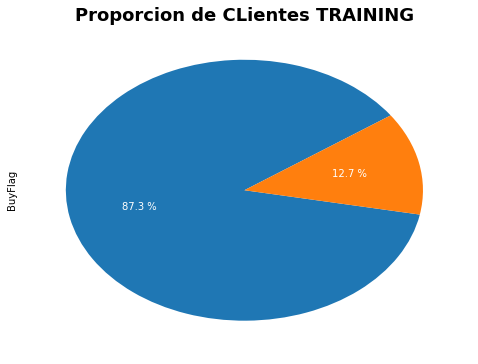

In [273]:
#Analis de los casos para la variable en estidio  , BuyFlag = 1 compro, 0 no compro
ax = df.BuyFlag.value_counts().plot.pie(startangle=35, autopct='%.1f %%', figsize=(8, 6),textprops=dict(color="w"))
ax.set_title("Proporcion de CLientes TRAINING", fontsize=18, weight="bold")


In [274]:
# seleccion de la muestra  para TRAIN y TEST

from sklearn.model_selection import train_test_split
train, test = train_test_split(df, test_size = 0.25)
print("Train :",train.shape,"| Test :",test.shape)

Train : (6082, 16) | Test : (2028, 16)


In [275]:
#seleccion de variable objetivo para train y test
train_y = train["BuyFlag"]
test_y = test['BuyFlag']

#eliminamos la variable objetivo para train y test
train_x = train
train_x.pop('BuyFlag')
test_x = test
test_x.pop('BuyFlag')
print("----------------Transformacion Correcta --------------")

----------------Transformacion Correcta --------------


In [276]:
#seleccion del modelo de regresion logistica, matriz de confusion
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report


### APLICAMOS EL MODELO DE REGRESION LOGISTICA 

In [278]:
logisticRegr = LogisticRegression()
logisticRegr.fit(X=train_x, y=train_y)

/anaconda/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

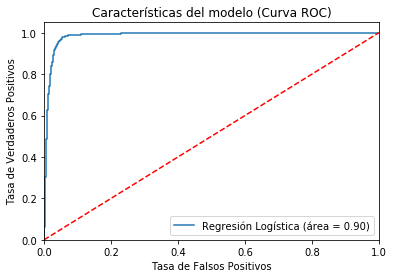

In [279]:
# Grafico para evaluar el modelo
import matplotlib.pyplot as plt
# Evaluacion del modelo (ROC)
curva_roc(train_y, train_x)

In [280]:
#Aplicamos el modelo de regresion logistica a los datos del testeo
test_y_pred = logisticRegr.predict(test_x)
test_y_pobabilidad = logisticRegr.predict_proba(test_x)

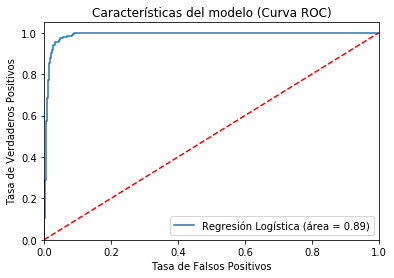

In [281]:
#evaluacion del modelo 
curva_roc(test_y, test_x)

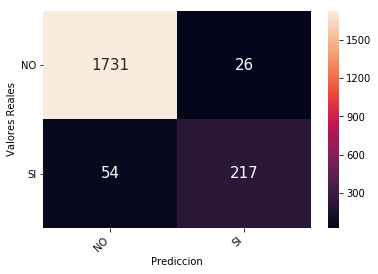

In [282]:
#Matriz de confusion para el modelo predecido
import seaborn as sns
import numpy as np

confusion_matrix_train = confusion_matrix(test_y, test_y_pred)
matriz_confusion(confusion_matrix_train, 'matriz_confusion')